the star of project for ML #to be edited

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from io import StringIO
from sklearn.model_selection import train_test_split

In [2]:
# currently not in use as it does not work well
class DataWrapper:
    not_categorical = ['Age', 'Mother education', 'Father education', 
                       'Travel_Time','Study_Time' ,'Number_of_Failures',
                       'Family_Relationship', 'Free_Time', 'Going_Out', 'Weekend_Alcohol_Consumption',	'Weekday_Alcohol_Consumption',
                        'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']
    def __init__(self):
        url = 'https://raw.githubusercontent.com//zdralmat/ML_group_project/main/student%20dropout.csv'
        response = requests.get(url)
        if response.status_code == 200:
            self.data_original = pd.read_csv(StringIO(response.text))
        else:
            raise Exception("failed to load the data")
        
        self.data = self.enumerate_data()

        self.X = self.data.drop(columns=['Dropped_Out'])
        self.y = self.data['Dropped_Out']
        self.X_train,self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def enumerate_data(self):
        data = self.data_original.copy()
        recovery_map = {}
        for column in data.columns:
            iter = data[column].unique()
            mapping = {}
            for i, value in enumerate(iter):
                mapping[value] = i
            if column not in self.not_categorical:
                data[column] = data[column].map(mapping)
                recovery_map[column] = {v: k for k, v in mapping.items()}
            else:
                recovery_map[column] = {v: v for v in iter}
        self.recovery_map = recovery_map
        print(recovery_map)
        print(data)
        return data
    
    




In [3]:
def load_from_github():
  url = 'https://raw.githubusercontent.com//zdralmat/ML_group_project/main/student%20dropout.csv'
  response = requests.get(url)
  if response.status_code == 200:
      return pd.read_csv(StringIO(response.text))
  else:
      raise Exception("failed to load the data")      


TO_RUN = (False, False, True)


#df = pd.read_csv('student dropout.csv')
df = load_from_github()

#df = pd.read_csv('student dropout.csv')




In [4]:
pd.set_option('display.max_columns', None)
print(df.shape)

df.head()
df.sample(20)

(649, 34)


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
491,MS,F,19,U,GT3,T,1,1,other,other,course,other,2,2,1,no,yes,no,no,yes,yes,yes,yes,1,1,4,4,1,1,12,7,8,9,True
22,GP,M,16,U,LE3,T,4,2,teacher,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,4,5,1,1,3,5,0,12,13,14,False
638,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16,False
597,MS,F,18,R,GT3,T,2,2,at_home,other,course,mother,3,2,1,no,no,no,yes,yes,yes,no,yes,4,3,3,1,1,4,0,9,0,0,True
188,GP,F,16,U,LE3,T,3,3,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,4,4,5,1,1,4,0,14,14,15,False
387,GP,M,18,U,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,no,no,no,no,yes,yes,no,5,4,2,1,2,5,6,15,14,15,False
628,MS,F,17,U,GT3,T,2,2,other,at_home,home,mother,1,3,0,no,no,no,yes,yes,yes,no,yes,3,4,3,1,1,3,8,10,11,12,False
77,GP,F,16,U,GT3,T,2,2,other,other,reputation,mother,1,4,0,no,no,no,no,yes,yes,yes,yes,5,2,3,1,3,3,1,13,13,13,False
458,MS,F,16,R,GT3,T,1,1,other,other,home,father,4,4,0,no,yes,no,no,no,yes,yes,no,4,3,2,1,1,1,0,13,10,13,False
177,GP,M,16,U,GT3,T,1,3,at_home,services,course,father,1,1,1,no,no,no,no,yes,no,yes,no,5,3,3,1,4,2,2,9,8,8,True


In [5]:

df.info(verbose=False)

print(df.isnull().sum().sort_values(ascending=True))

df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Columns: 34 entries, School to Dropped_Out
dtypes: bool(1), int64(16), object(17)
memory usage: 168.1+ KB
School                         0
Grade_2                        0
Grade_1                        0
Number_of_Absences             0
Health_Status                  0
Weekday_Alcohol_Consumption    0
Weekend_Alcohol_Consumption    0
Going_Out                      0
Free_Time                      0
Family_Relationship            0
In_Relationship                0
Internet_Access                0
Wants_Higher_Education         0
Attended_Nursery               0
Extra_Curricular_Activities    0
Extra_Paid_Class               0
Family_Support                 0
School_Support                 0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Final_Grade                   

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<h2>Feature selection bellow </h2>

eather we need to edit datatset so in can be transformed in to a float or we cannot use moste of the methods for feature selection

In [6]:
#splitting data and labels
Data = DataWrapper()
X = Data.X.copy()
y = Data.y.copy()



{'School': {0: 'GP', 1: 'MS'}, 'Gender': {0: 'F', 1: 'M'}, 'Age': {18: 18, 17: 17, 15: 15, 16: 16, 19: 19, 22: 22, 20: 20, 21: 21}, 'Address': {0: 'U', 1: 'R'}, 'Family_Size': {0: 'GT3', 1: 'LE3'}, 'Parental_Status': {0: 'A', 1: 'T'}, 'Mother_Education': {0: 4, 1: 1, 2: 3, 3: 2, 4: 0}, 'Father_Education': {0: 4, 1: 1, 2: 2, 3: 3, 4: 0}, 'Mother_Job': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'Father_Job': {0: 'teacher', 1: 'other', 2: 'services', 3: 'health', 4: 'at_home'}, 'Reason_for_Choosing_School': {0: 'course', 1: 'other', 2: 'home', 3: 'reputation'}, 'Guardian': {0: 'mother', 1: 'father', 2: 'other'}, 'Travel_Time': {2: 2, 1: 1, 3: 3, 4: 4}, 'Study_Time': {2: 2, 3: 3, 1: 1, 4: 4}, 'Number_of_Failures': {0: 0, 3: 3, 1: 1, 2: 2}, 'School_Support': {0: 'yes', 1: 'no'}, 'Family_Support': {0: 'no', 1: 'yes'}, 'Extra_Paid_Class': {0: 'no', 1: 'yes'}, 'Extra_Curricular_Activities': {0: 'no', 1: 'yes'}, 'Attended_Nursery': {0: 'yes', 1: 'no'}, 'Wants_Higher_E

<h3> Variance treshold Feature selection </h3>

would require to use only on columns convertable to float or transfrom data in to form accepted by the method



In [7]:
from sklearn.feature_selection import VarianceThreshold

#removing constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)

VarianceThreshold(threshold=0)

<h3> SelectKBest Feature selection </h3>

In [8]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression


X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)

X_new = SelectKBest(f_classif, k=10).fit_transform(X, y)
print(X_new.shape)

X_new = SelectKBest(f_regression, k=10).fit_transform(X, y)
print(X_new.shape)

(649, 10)
(649, 10)
(649, 10)


<h3> Recursive Feature Elimination </h3>


In [9]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
X_new = selector.transform(X)
print(X_new.shape)

[ True False False False  True False False False False False False  True
  True  True  True  True False False False False  True False False False
 False False False False False False False  True  True]
[ 1 14 10 12  1  7 11  2 15 20 17  1  1  1  1  1 13  5 16  3  1  4 24 19
 22  9 21 18  8 23  6  1  1]
(649, 10)


<h3> Feature selection using SelectFromModel </h3>



In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3),
              n_features_to_select=10,
              direction='backward').fit(X, y)
print(sfs.get_support())
X_new = sfs.transform(X)
print(X_new.shape)

[False False  True  True False False False  True False False False False
  True False  True False False False False  True False  True False False
 False False False  True False False False  True  True]
(649, 10)


all of feature selection methods are currently being ignored feel free to use them i did not use them as i do not understad them well enough to use them 
also it is using my enumeration which might be not good even for this task
do with it what you will

<h2> classification </h2>

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.pipeline import Pipeline


warning: the tuning of hyperparameters takes a while

In [12]:
def hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='accuracy'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_ , grid_search.best_estimator_


my enumeration did not work as intended so i borrowed the code from the following link
https://www.kaggle.com/code/mhamza786/student-dropout-analysis
is very similar to code that can be found in the documentatation of the sklearn library so 
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
so i thing it should be fine to use it

In [13]:
X = df.drop(columns=['Dropped_Out'])
X_clustering = df[['Grade_1', 'Grade_2', 'Final_Grade']]
y = df['Dropped_Out']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clustering, X_test_clustering, y_train_clustering, y_test_clustering = train_test_split(X_clustering, y, test_size=0.2, random_state=42)

In [14]:


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

column_transformer = ColumnTransformer(
    transformers=[
        ['encoder', OneHotEncoder(), categorical_features],
        ['scaler', StandardScaler(), numeric_features]
    ],
    remainder='passthrough'
)

numeric_features_clustering = X_train_clustering.select_dtypes(include=['int64', 'float64']).columns

column_transformer_clustering = ColumnTransformer(
    transformers=[
        ['scaler', StandardScaler(), numeric_features_clustering]
    ],
    remainder='passthrough'
)





label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

y_train_clustering = label_encoder.fit_transform(y_train_clustering)
y_test_clustering = label_encoder.transform(y_test_clustering)





In [15]:
class Result:
    def __init__(self, name , value, params):
        self.name = name
        self.value = value
        self.params = params
    
    def __str__(self):
        return f'{self.name}: {self.value} with params: {self.params}'
    
    def __repr__(self):
        return self.__str__()

In [16]:
class Table:
    def __init__(self, model_names, metric_names):
        self.model_names = model_names
        self.metric_names = metric_names
        self.data = {model: {metric: [] for metric in metric_names} for model in model_names}
    
    def add_result(self, model_name, metric_name, value, params):
        self.data[model_name][metric_name].append(Result(metric_name, value, params))
    
    def __str__(self):
        result = ''
        for model_name in self.model_names:
            result += f'{model_name}\n'
            for metric_name in self.metric_names:
                result += f'{metric_name}: {self.data[model_name][metric_name]}\n'
        return result
    
    def model(self, model_name):
        string = ''
        data = self.data[model_name]
        for metric_name in self.metric_names:
            string += f'{str(data[metric_name])}\n'
        
        return string
    
        

In [17]:
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
metrics_mapping = {
    'accuracy': accuracy_score,
    'f1': f1_score,
    'precision': precision_score,
    'recall': recall_score,
    'roc_auc': roc_auc_score
}
models = ['CART', 'RandomForest', 'SVM', 'GaussianNB', 'MultinomialNB', 'BernoulliNB']

table = Table(models, metrics)
print(table)


CART
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
RandomForest
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
SVM
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
GaussianNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
MultinomialNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
BernoulliNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []



In [18]:
# Ensure X_train and X_test have the same columns
assert list(X_train.columns) == list(X_test.columns), "X_train and X_test have different columns"

# Fit the column transformer on the training data only
column_transformer.fit(X_train)

# Transform the training and test data separately
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:


CART_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [10, 50, 100, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

CART = DecisionTreeClassifier()
pipe = Pipeline(steps=[('classifier', CART)])

if TO_RUN[0]:
    for metric in metrics:
        params, value, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, CART_params, scoring=metric)
        table.add_result('CART', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), params)

    print(table.model('CART'))

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[accuracy: 1.0 with params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}]
[f1: 1.0 with params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}]
[precision: 1.0 with params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}]
[recall: 1.0 with params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}]
[roc_auc: 1.0 with params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, '



it ran for 78 minutes on my machine so would recomend not to run it yourself

(talking aout the cell below)

In [20]:

rf_params = {'classifier__n_estimators': [10, 50, 100, 300, 500], 
             'classifier__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf': [1, 2, 5, 10], 
             'classifier__max_features': [None, 'sqrt', 'log2']}

#rf_params = {'classifier__n_estimators': [10, 50, 100, 300, 500]}
rf = RandomForestClassifier()
pipe = Pipeline(steps=[('classifier', rf)])

if TO_RUN[0]:
    for metric in metrics:
        best_params, best_score, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, rf_params, scoring=metric)
        table.add_result('RandomForest', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("RandomForest: ", table.model('RandomForest'))


In [21]:

svm_params = {'classifier__C': [0.1, 1, 10, 100, 1000], 'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'classifier__kernel': ['rbf', 'poly', 'sigmoid']}
machine = svm.SVC()
pipe = Pipeline(steps=[('classifier', machine)])
if TO_RUN[0]:
    for metric in metrics:
        best_params, svm_score, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, svm_params, scoring=metric)
        table.add_result('SVM', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("SVM : ", table.model('SVM'))

In [22]:
gaussian_params = {"classifier__var_smoothing": [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]}
bernouli_params = {"classifier__alpha": [1.0, 0.1, 0.01, 0.001, 0.0001]}
multinomial_params = {"classifier__alpha": [1.0, 0.1, 0.01, 0.001, 0.0001]}

gaussian = GaussianNB()
g_pipe = Pipeline(steps=[('classifier', gaussian)])
bernouli = BernoulliNB()
b_pipe = Pipeline(steps=[('classifier', bernouli)])
multinomial = MultinomialNB()
m_pipe = Pipeline(steps=[('classifier', multinomial)])


if TO_RUN[0]:
    for metric in metrics:
        best_gaussian_params, gaussian_score, gaussian_model = hyperparametar_tuning(g_pipe, X_train_transformed, y_train, gaussian_params, scoring=metric)
        table.add_result('GaussianNB', metric, metrics_mapping[metric](y_test, gaussian_model.predict(X_test_transformed)), best_gaussian_params)
        
        best_bernouli_params, bernouli_score, bernouli_model = hyperparametar_tuning(b_pipe, X_train_transformed, y_train, bernouli_params, scoring=metric)
        table.add_result('BernoulliNB', metric, metrics_mapping[metric](y_test, bernouli_model.predict(X_test_transformed)), best_bernouli_params)
        
        # Ensure no negative values for MultinomialNB
        
        X_non_negative_train = np.maximum(X_train_transformed, 0)
        X_non_negative_test = np.maximum(X_test_transformed, 0)
        best_multinomial_params, multinomial_score, multinomial_model = hyperparametar_tuning(m_pipe, X_non_negative_train, y_train, multinomial_params, scoring=metric)
        table.add_result('MultinomialNB', metric, metrics_mapping[metric](y_test, multinomial_model.predict(X_non_negative_test)), best_multinomial_params)

    print("GaussianNB: ",table.model('GaussianNB'))
    print("BernoulliNB: ",table.model('BernoulliNB'))
    print("MultinomialNB: ",table.model('MultinomialNB'))

    print(table)

In [23]:
def save_table(table, filename):
    with open(filename, 'w') as file:
        file.write(str(table))



In [24]:
if TO_RUN[0]:
    save_table(table, 'results_classification_no_spill_.txt')

<h2> regression </h2>

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [26]:
def regre_hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='neg_mean_squared_error'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_ , grid_search.best_estimator_

In [27]:
metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
metrics_mapping = {
    'neg_mean_squared_error': mean_squared_error,
    'r2': r2_score,
    'neg_mean_absolute_error': mean_absolute_error,
    'neg_mean_absolute_percentage_error': mean_absolute_percentage_error
}

models = ['LinearRegression', 'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor', 'NuSVR', 'DecisionTreeRegressor', 'RandomForestRegressor']

table_regre = Table(models, metrics)

In [28]:
H_params = {'alpha': [0.1, 1, 10, 100, 1000], 'epsilon': [1, 1.35, 10, 100, 1000], 'max_iter': [100, 1000, 10000]}
H = HuberRegressor()
#H_params, H_score = regre_hyperparametar_tuning(H, X, y, H_params)
#print(H_params, H_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(H, X_train_transformed, y_train, H_params, scoring=metric)
        print(best_params, best_score)
        #table_regre.add_result('HuberRegressor', metric, best_score, best_params)
        table_regre.add_result('HuberRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("HuberRegressor: ", table_regre.model('HuberRegressor'))

In [29]:
if TO_RUN[1]:
    print(table_regre)

In [30]:
RANSAC_params = {'min_samples': [0.1, 1, 10, 100], 'max_trials': [100, 1000, 10000]}
RANSAC = RANSACRegressor()

#RANSAC_params, RANSAC_score = regre_hyperparametar_tuning(RANSAC, X, y, RANSAC_params)
#print(RANSAC_params, RANSAC_score)
if TO_RUN[1]:
    for metric_name in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(RANSAC, X_train_transformed, y_train, RANSAC_params, scoring=metric_name)
        #table_regre.add_result('RANSACRegressor', metric_name, best_score, best_params)
        table_regre.add_result('RANSACRegressor', metric_name, metrics_mapping[metric_name](model.predict(X_test_transformed), y_test), best_params)

    print("RANSACRegressor: ", table_regre.model('RANSACRegressor'))


In [31]:
theil_params = {'max_subpopulation': [ 1, 10, 100, 1000], 'max_iter': [100, 300, 1000, 10000]}
theil = TheilSenRegressor()

#theil_params, theil_score = regre_hyperparametar_tuning(theil, X, y, theil_params)
#print(theil_params, theil_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(theil, X_train_transformed, y_train, theil_params, scoring=metric)
        #table_regre.add_result('TheilSenRegressor', metric, best_score, best_params)
        table_regre.add_result('TheilSenRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("TheilSenRegressor: ", table_regre.model('TheilSenRegressor'))

In [32]:
NuSVR_params = {'nu': [0.0001,0.001,0.01,0.1, 1], 'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid']}
NuSVR_ = NuSVR()

#NuSVR_params, NuSVR_score = regre_hyperparametar_tuning(NuSVR_, X, y, NuSVR_params)
#print(NuSVR_params, NuSVR_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(NuSVR_, X_train_transformed, y_train, NuSVR_params, scoring=metric)
        #table_regre.add_result('NuSVR', metric, best_score, best_params)
        table_regre.add_result('NuSVR', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("NuSVR: ", table_regre.model('NuSVR'))

In [33]:
dt_params = {'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'], 'splitter': ['best', 'random'], 'max_depth': [None]+ [x for x in range(5,100,5)]}
dt = DecisionTreeRegressor()

#dt_params, dt_score = regre_hyperparametar_tuning(dt, X, y, dt_params)
#print(dt_params, dt_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(dt, X_train_transformed, y_train, dt_params, scoring=metric)
        #table_regre.add_result('DecisionTreeRegressor', metric, best_score, best_params)
        table_regre.add_result('DecisionTreeRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("DecisionTreeRegressor: ", table_regre.model('DecisionTreeRegressor'))

In [34]:
rfr_params = {'n_estimators': [x for x in range(10,500,100)], 'max_depth': [None]+ [x for x in range(5,100,5)]}
rfr = RandomForestRegressor()

#rfr_params, rfr_score = regre_hyperparametar_tuning(rfr, X, y, rfr_params)
#print(rfr_params, rfr_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(rfr, X_train_transformed, y_train, rfr_params, scoring=metric)
        #table_regre.add_result('RandomForestRegressor', metric, best_score, best_params)
        table_regre.add_result('RandomForestRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("RandomForestRegressor: ", table_regre.model('RandomForestRegressor'))

In [35]:
linear_params = {'fit_intercept': [True, False], 'copy_X': [True, False]}
linear = linear_model.LinearRegression()
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(linear, X_train_transformed, y_train, linear_params, scoring=metric)
        #table_regre.add_result('LinearRegression', metric, best_score, best_params)
        table_regre.add_result('LinearRegression', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("LinearRegression: ", table_regre.model('LinearRegression'))

In [36]:

if TO_RUN[1]:
    save_table(table_regre, 'results_regression_.txt')


    with open('results_regression_.txt', 'a') as file:
        file.write("\n the negative metrics are alredy replaced with normal ones in the table\n")



<h2> clustering </h2>

for the clustering we are using only 3 columns so we can graph it if you thing we should do it with the complete dataset let me know

In [60]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import make_scorer

In [61]:
def cluster_hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='silhouette_score'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_


In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_clustering_3d(X, labels, title='Clustering Results'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = set(labels)
    colors = plt.get_cmap('viridis', len(unique_labels))

    for k in unique_labels:
        class_member_mask = (labels == k)
        xyz = X[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=50, color=colors(k / len(unique_labels)), label=f'Cluster {k}')

    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()
    plt.show()

In [63]:
def ari_scorer(estimator, X, y_true):
    cluster_labels = estimator.fit_predict(X)
    return adjusted_rand_score(y_true, cluster_labels)

def ami_scorer(estimator, X, y_true):
    cluster_labels = estimator.fit_predict(X)
    return adjusted_mutual_info_score(y_true, cluster_labels)

def homogeneity_scorer(estimator, X, y_true):
    cluster_labels = estimator.fit_predict(X)
    return homogeneity_score(y_true, cluster_labels)

def completeness_scorer(estimator, X, y_true):
    cluster_labels = estimator.fit_predict(X)
    return completeness_score(y_true, cluster_labels)

def v_measure_scorer(estimator, X, y_true):
    cluster_labels = estimator.fit_predict(X)
    return v_measure_score(y_true, cluster_labels)

In [ ]:

models = ['KMeans', 'DBSCAN', 'AgglomerativeClustering', 'OPTICS', 'Birch']
metrics = [ 'adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score'] #'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score', are not available for DBSCAN

metrics_mapping = {
    'adjusted_rand_score': make_scorer(ari_scorer),
    'adjusted_mutual_info_score': make_scorer(ami_scorer),
    'homogeneity_score': make_scorer(homogeneity_scorer),
    'completeness_score': make_scorer(completeness_scorer),
    'v_measure_score': make_scorer(v_measure_scorer)
}

cluster_table = Table(models, metrics)

In [40]:
X_train_clustering_transformed = column_transformer_clustering.fit_transform(X_train_clustering)
X_test_clustering_transformed = column_transformer_clustering.transform(X_test_clustering)


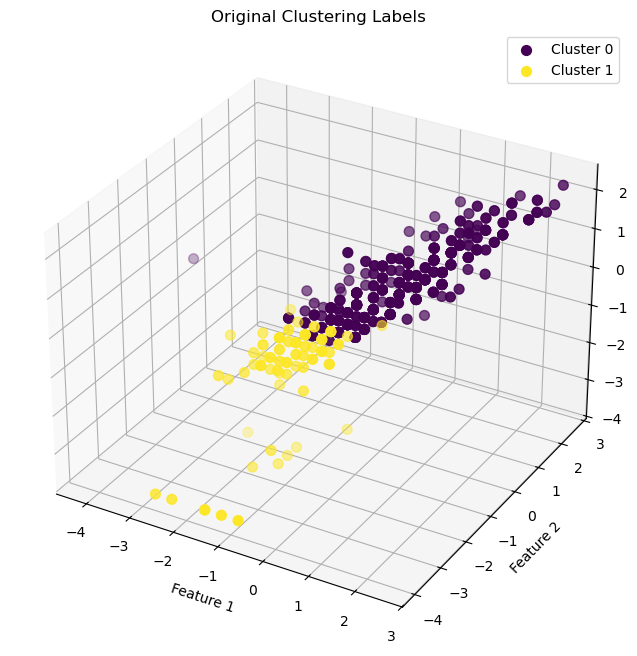

In [53]:
plot_clustering_3d(X_train_clustering_transformed, y_train_clustering, title='Original Clustering Labels')

In [54]:
K_params = {'n_clusters': [x for x in range(2,10)], 'init': ['k-means++', 'random'], 'n_init': [10, 100], 'max_iter': [100, 1000]}
K = KMeans()
model = KMeans()

if TO_RUN[2]:
    for metric in metrics:
        optimizer = GridSearchCV(K, K_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('KMeans', metric, metrics_mapping[metric](y_test_clustering, best_model.predict(X_test_clustering_transformed)), best_params)
        model = best_model


        #best_params, best_score = cluster_hyperparametar_tuning(KMeans, X_clustering, y, KMeans_params, scoring=metric)
        #cluster_table.add_result('KMeans', metric, best_score, best_params)

    print("KMeans: ", cluster_table.model('KMeans'))
    plot_clustering_3d(X_train_clustering_transformed, model.labels_, title='KMeans Clustering Results')


c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

KeyboardInterrupt: 

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^

DBSCAN:  [adjusted_rand_score: 0.0042889121486476955 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_rand_score: 0.0042889121486476955 with params: {'algorithm': 'auto', 'eps': 0.1, 'min_samples': 1}, adjusted_rand_score: 0.0042889121486476955 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_rand_score: 0.0042889121486476955 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_rand_score: 0.0042889121486476955 with params: {'eps': 0.1, 'min_samples': 1}]
[adjusted_mutual_info_score: 0.048140277065351705 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_mutual_info_score: 0.048140277065351705 with params: {'algorithm': 'auto', 'eps': 0.1, 'min_samples': 1}, adjusted_mutual_info_score: 0.048140277065351705 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_mutual_info_score: 0.048140277065351705 with params: {'eps': 0.1, 'min_samples': 1}, adjusted_mutual_info_score: 0.048140277065351705 with params: {'eps': 0.1, 'min_samples': 1}]
[homogeneity_score: 1.0 with params: 

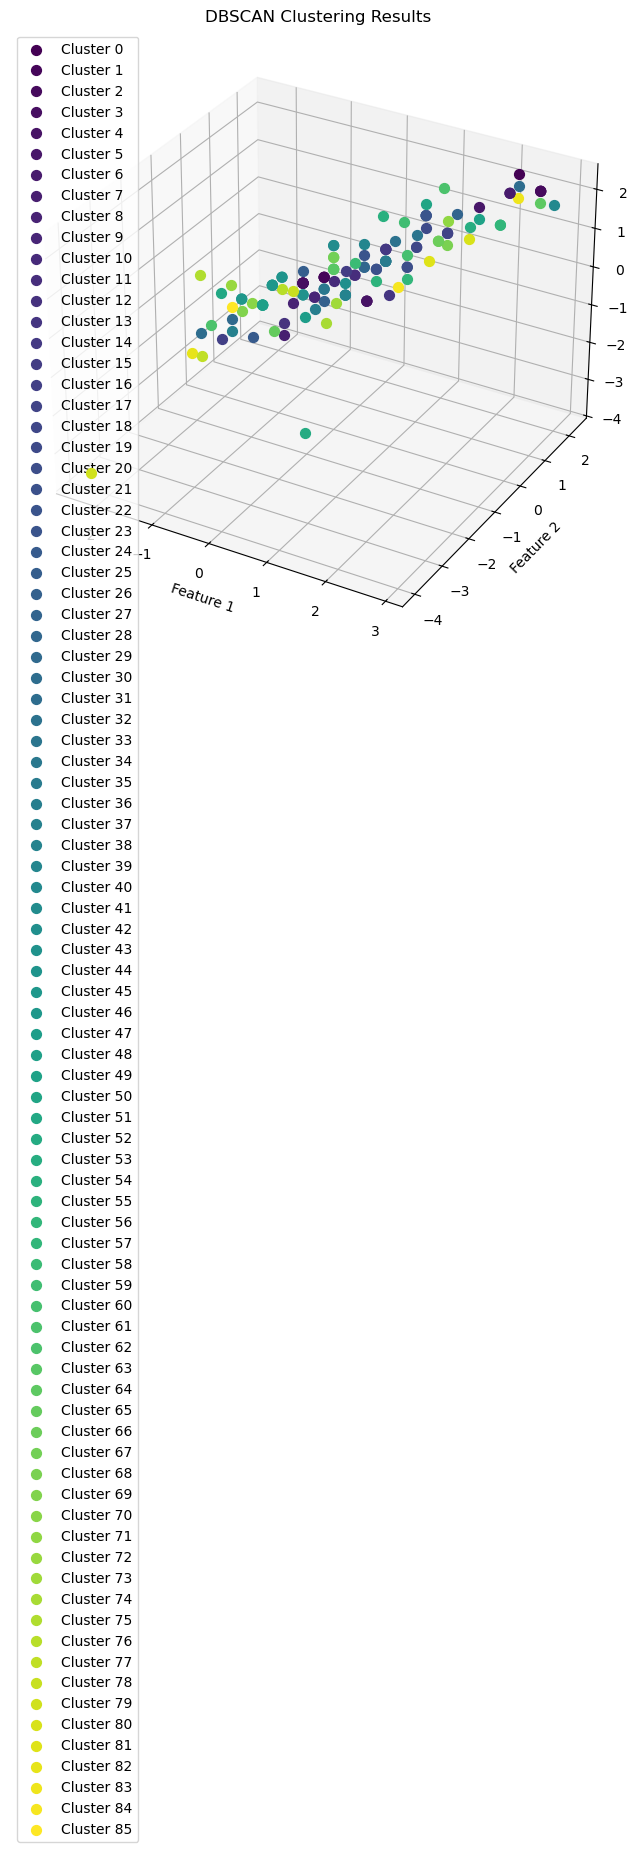

In [52]:
from sklearn.metrics import make_scorer

D_params = {'eps': [0.1, 1, 10, 100], 'min_samples': [1, 10, 100, 1000]}
D = DBSCAN()
model = DBSCAN()

if TO_RUN[2]:
    for metric in ['adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score']:
        scorer = make_scorer(metrics_mapping[metric])
        optimizer = GridSearchCV(D, D_params, cv=5, scoring=scorer)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('DBSCAN', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        model = best_model

    print("DBSCAN: ", cluster_table.model('DBSCAN'))
    plot_clustering_3d(X_test_clustering_transformed, model.labels_, title='DBSCAN Clustering Results')



Best Parameters for adjusted_rand_score: {'n_clusters': 6, 'linkage': 'average'}
Best Score for adjusted_rand_score: 0.3498937563191927
AgglomerativeClustering:  [adjusted_rand_score: -0.08638616266640754 with params: {'linkage': 'ward', 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.07471943115285536 with params: {'linkage': 'ward', 'n_clusters': 2}]
[homogeneity_score: 0.10875335323194327 with params: {'linkage': 'ward', 'n_clusters': 2}]
[completeness_score: 0.06677025016067896 with params: {'linkage': 'ward', 'n_clusters': 2}]
[v_measure_score: 0.08274087884199346 with params: {'linkage': 'ward', 'n_clusters': 2}]



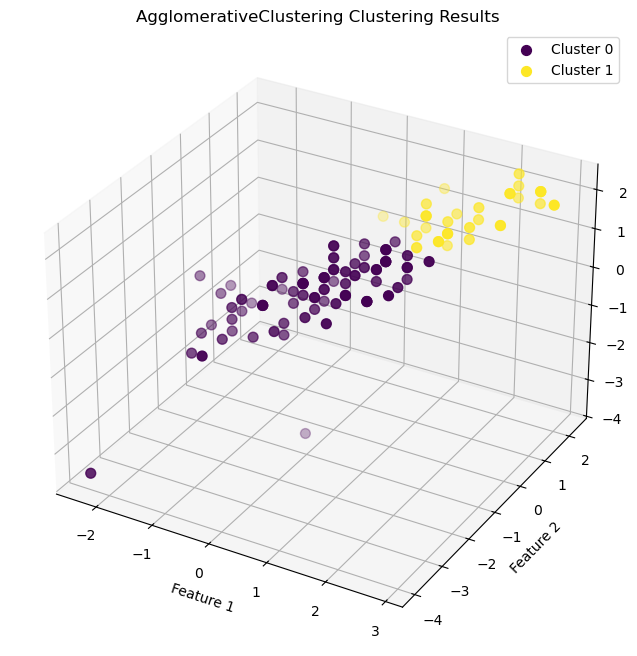

Best Parameters for adjusted_mutual_info_score: {'n_clusters': 3, 'linkage': 'complete'}
Best Score for adjusted_mutual_info_score: 0.4611052332297904
AgglomerativeClustering:  [adjusted_rand_score: -0.08638616266640754 with params: {'linkage': 'ward', 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.07471943115285536 with params: {'linkage': 'ward', 'n_clusters': 2}]
[homogeneity_score: 0.10875335323194327 with params: {'linkage': 'ward', 'n_clusters': 2}]
[completeness_score: 0.06677025016067896 with params: {'linkage': 'ward', 'n_clusters': 2}]
[v_measure_score: 0.08274087884199346 with params: {'linkage': 'ward', 'n_clusters': 2}]



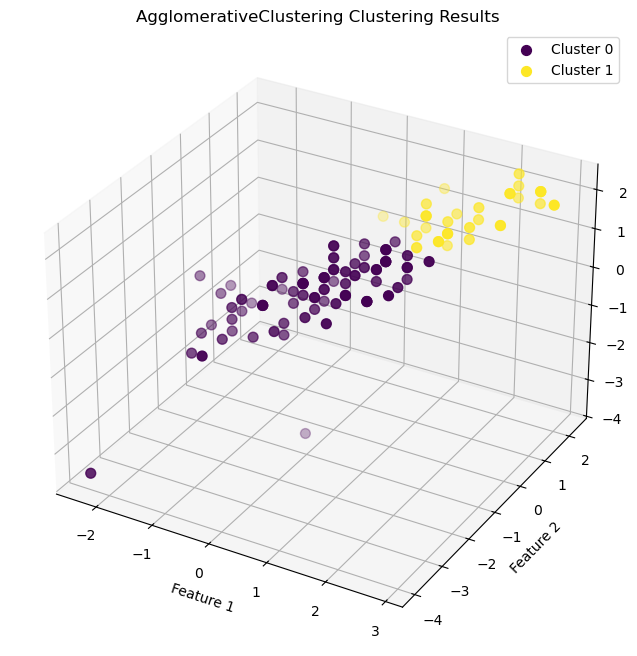

Best Parameters for homogeneity_score: {'n_clusters': 9, 'linkage': 'complete'}
Best Score for homogeneity_score: 0.7683959298820561
AgglomerativeClustering:  [adjusted_rand_score: -0.08638616266640754 with params: {'linkage': 'ward', 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.07471943115285536 with params: {'linkage': 'ward', 'n_clusters': 2}]
[homogeneity_score: 0.10875335323194327 with params: {'linkage': 'ward', 'n_clusters': 2}]
[completeness_score: 0.06677025016067896 with params: {'linkage': 'ward', 'n_clusters': 2}]
[v_measure_score: 0.08274087884199346 with params: {'linkage': 'ward', 'n_clusters': 2}]



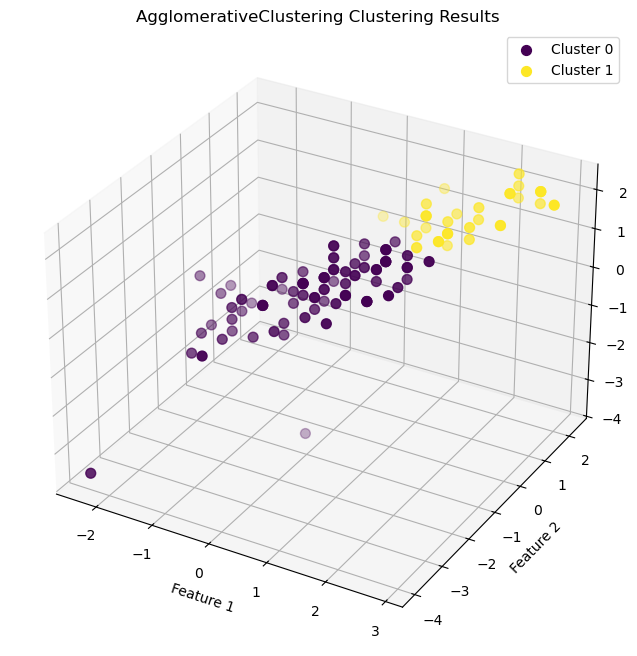

Best Parameters for completeness_score: {'n_clusters': 2, 'linkage': 'average'}
Best Score for completeness_score: 0.4094006396319954
AgglomerativeClustering:  [adjusted_rand_score: -0.08638616266640754 with params: {'linkage': 'ward', 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.07471943115285536 with params: {'linkage': 'ward', 'n_clusters': 2}]
[homogeneity_score: 0.10875335323194327 with params: {'linkage': 'ward', 'n_clusters': 2}]
[completeness_score: 0.06677025016067896 with params: {'linkage': 'ward', 'n_clusters': 2}]
[v_measure_score: 0.08274087884199346 with params: {'linkage': 'ward', 'n_clusters': 2}]



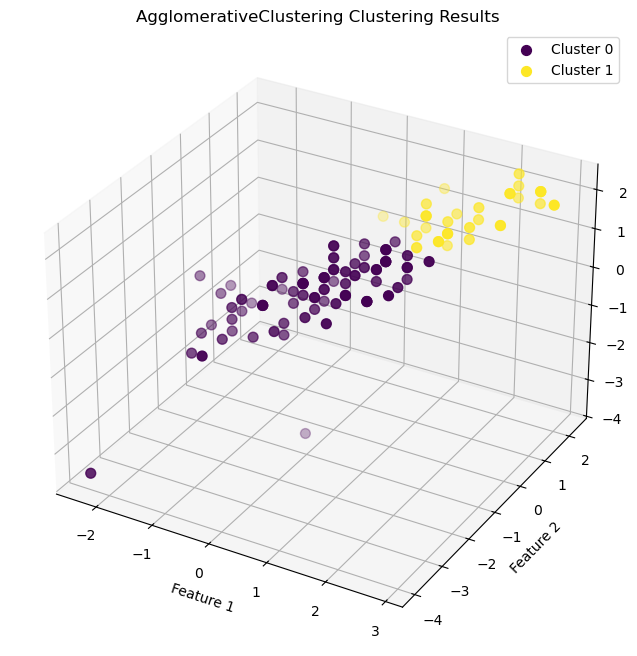

Best Parameters for v_measure_score: {'n_clusters': 3, 'linkage': 'complete'}
Best Score for v_measure_score: 0.4625823270070667
AgglomerativeClustering:  [adjusted_rand_score: -0.08638616266640754 with params: {'linkage': 'ward', 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.07471943115285536 with params: {'linkage': 'ward', 'n_clusters': 2}]
[homogeneity_score: 0.10875335323194327 with params: {'linkage': 'ward', 'n_clusters': 2}]
[completeness_score: 0.06677025016067896 with params: {'linkage': 'ward', 'n_clusters': 2}]
[v_measure_score: 0.08274087884199346 with params: {'linkage': 'ward', 'n_clusters': 2}]



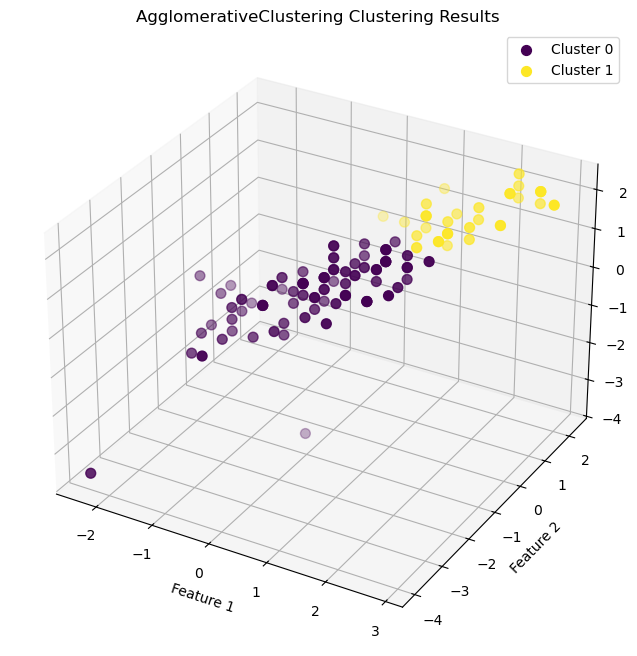

In [73]:
from itertools import product

Agglo_params = {'n_clusters': [x for x in range(2,10)], 'linkage': ['ward', 'complete', 'average', 'single']}
Agglo = AgglomerativeClustering()
model = AgglomerativeClustering()

if TO_RUN[2]:
    metrics = {
    'adjusted_rand_score': adjusted_rand_score,
    'adjusted_mutual_info_score': adjusted_mutual_info_score,
    'homogeneity_score': homogeneity_score,
    'completeness_score': completeness_score,
    'v_measure_score': v_measure_score
}

# Function to perform manual hyperparameter tuning
def manual_hyperparam_tuning(X, y_true, param_grid, metrics):
    best_params = {metric: None for metric in metrics}
    best_scores = {metric: float('-inf') for metric in metrics}

    # Generate all combinations of parameters
    keys, values = zip(*param_grid.items())
    for v in product(*values):
        params = dict(zip(keys, v))
        model = AgglomerativeClustering(**params)
        cluster_labels = model.fit_predict(X)

        # Evaluate each metric
        for metric_name, metric_func in metrics.items():
            score = metric_func(y_true, cluster_labels)
            if score > best_scores[metric_name]:
                best_scores[metric_name] = score
                best_params[metric_name] = params

    return best_params, best_scores

# Perform manual hyperparameter tuning
best_params, best_scores = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, Agglo_params, metrics)

# Print the best parameters and scores for each metric
for metric_name in metrics:
    print(f"Best Parameters for {metric_name}: {best_params[metric_name]}")
    print(f"Best Score for {metric_name}: {best_scores[metric_name]}")

    '''for metric in metrics:
        scorer = metrics_mapping[metric]
        optimizer = GridSearchCV(Agglo, Agglo_params, cv=5, scoring=scorer)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('AgglomerativeClustering', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        model = best_model'''

    print("AgglomerativeClustering: ", cluster_table.model('AgglomerativeClustering'))
    plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='AgglomerativeClustering Clustering Results')


In [70]:
OPTICS_params = {'min_samples': [2, 10, 100, 1000], 'max_eps': [0.1, 1, 10, 100]}
optics = OPTICS()


if TO_RUN[2]:
    for metric in metrics:
        optimizer = GridSearchCV(optics, OPTICS_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('OPTICS', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)

    print("OPTICS: ", cluster_table.model('OPTICS'))





c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^^^^^^^^^^^^^

OPTICS:  [adjusted_rand_score: -0.10470082745783026 with params: {'max_eps': 0.1, 'min_samples': 2}]
[adjusted_mutual_info_score: 0.002133731603963264 with params: {'max_eps': 0.1, 'min_samples': 2}]
[homogeneity_score: 0.2805224581843768 with params: {'max_eps': 0.1, 'min_samples': 2}]
[completeness_score: 0.040767854876672394 with params: {'max_eps': 0.1, 'min_samples': 2}]
[v_measure_score: 0.071189814320577 with params: {'max_eps': 0.1, 'min_samples': 2}]



c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warni

Birch:  [adjusted_rand_score: 0.084538564254951 with params: {'branching_factor': 200, 'threshold': 0.1}, adjusted_rand_score: 0.084538564254951 with params: {'branching_factor': 200, 'threshold': 0.1}]
[adjusted_mutual_info_score: 0.20164789139180994 with params: {'branching_factor': 200, 'threshold': 0.1}, adjusted_mutual_info_score: 0.20164789139180994 with params: {'branching_factor': 200, 'threshold': 0.1}]
[homogeneity_score: 0.4208581374387513 with params: {'branching_factor': 200, 'threshold': 0.1}, homogeneity_score: 0.4208581374387513 with params: {'branching_factor': 200, 'threshold': 0.1}]
[completeness_score: 1.0 with params: {'branching_factor': 50, 'threshold': 10}, completeness_score: 1.0 with params: {'branching_factor': 50, 'threshold': 10}]
[v_measure_score: 0.2107793431592651 with params: {'branching_factor': 200, 'threshold': 0.1}, v_measure_score: 0.2107793431592651 with params: {'branching_factor': 200, 'threshold': 0.1}]



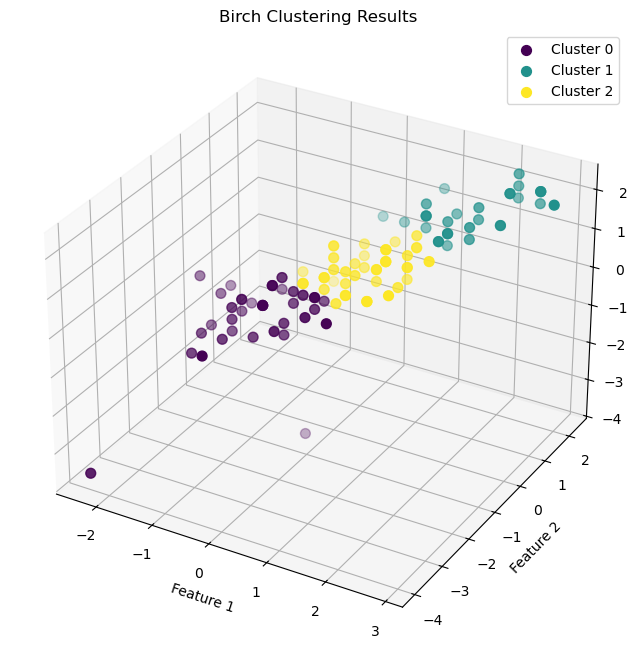

In [69]:
birch_params = {'threshold': [0.1, 1, 10, 100], 'branching_factor': [50, 100, 200, 300]}
birch = Birch()
model = Birch()

if TO_RUN[2]:
    for metric in metrics:
        optimizer = GridSearchCV(birch, birch_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('Birch', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        model = best_model
    print("Birch: ", cluster_table.model('Birch'))
    plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='Birch Clustering Results')




In [ ]:
if TO_RUN[2]:
    save_table(cluster_table, 'results_clustering.txt')
